In [1]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [17]:
L = 1.
nt = 100
nx = 51
alpha = 1.22e-3

q = 0.

dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0] = 100

### 1.1.3 Soving a linear system

wooooo. use `scipy.linalg` to import `solve`

In [4]:
from scipy.linalg import solve

In [18]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
        
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
        
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
    
    #setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    #ensure the last cell of the diagonal has Neumann b.c.
    d[-1,-1] = 1+1./sigma
    
    #setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    #setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A   

In [24]:
def generateRHS(T, sigma, qdx):
    """ Computes right-hand side of linear system for diffusion euqation
        with backward Euler
        
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    qdx: float
        flux at right boundary * dx
    
    Returns:
    -------
    b: array of float
        Right-hand size of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*1./sigma
    
    # Consider Dirichlet b.c. at left boundary
    
    b[0] += T[0]
    
    # Consider Neumann b.c. at right boundary
    
    b[-1] += qdx
    
    return b

Define a function that steps in time using the implicit central-space scheme. important detail is that a step in time is performed by solving the entire linear system, which is unlike an explicit scheme, and implies a considerable computational cost.

In [25]:
def implicit_btcs(T, A, nt, sigma, qdx):
    """ Advances diffusion equation in time with implicit central scheme
    
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha+td/dx^2
    qdx: float
        flux at right boundary * dx
    Returns:
    -------
    T: array of floats
        temperature profiled after nt time steps    
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2] + qdx
        
    return T

In [26]:
sigma = 0.5
dt = sigma * dx*dx/alpha
nt = 1000

A = generateMatrix(nx, sigma)

In [27]:
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [28]:
T = implicit_btcs(Ti.copy(), A, nt, sigma, qdx)

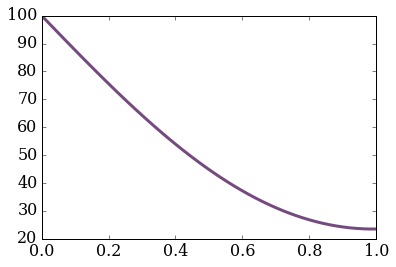

In [29]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#754A7E', ls='-', lw=3);

Looks pretty similar :(, but let's try $\alpha \frac{\Delta t}{\Delta x^2} = 5$

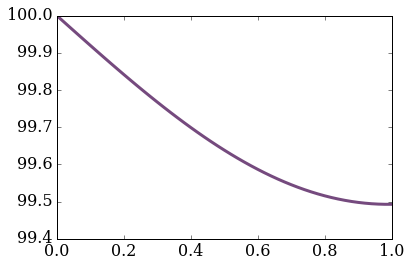

In [30]:
sigma = 5.0

A = generateMatrix(nx, sigma)

T = implicit_btcs(T.copy(), A, nt, sigma, qdx)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#754A7E', ls='-', lw=3);